## Pandas DataFrame

* ### Calculating Statistics From Data In A Pandas DataFrame

In [4]:
import pandas as pd

import numpy as np

# Operating System ....
import os

os.listdir("/resources/data/MSTC")

['aapl_ohlc.csv', 'OSA_DB_UPM_Clinical.csv', 'OSA_DB_UPM_Age_Gender.csv']

In [5]:
OSA_Clinical_df = pd.read_csv("/resources/data/MSTC/OSA_DB_UPM_Clinical.csv",sep=';',na_values=['-1'])

In [6]:
OSA_Clinical_df.head(5)

,ID,IAH,Weight,Height,Cervical
0,1,71.0,82.0,168.0,NaN
1,2,29.6,119.0,174.0,48.0
2,3,56.0,NaN,NaN,43.0
3,4,19.7,78.0,168.0,42.0
4,5,9.0,80.0,173.0,40.0


In [7]:
OSA_Clinical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 617 entries, 0 to 616
Data columns (total 5 columns):
ID          617 non-null int64
IAH         607 non-null float64
Weight      616 non-null float64
Height      616 non-null float64
Cervical    610 non-null float64
dtypes: float64(4), int64(1)
memory usage: 24.2 KB


In [8]:
# See thta CSV contains header!
OSA_Clinical_df.head(5)

,ID,IAH,Weight,Height,Cervical
0,1,71.0,82.0,168.0,NaN
1,2,29.6,119.0,174.0,48.0
2,3,56.0,NaN,NaN,43.0
3,4,19.7,78.0,168.0,42.0
4,5,9.0,80.0,173.0,40.0


In [9]:
OSA_Clinical_df.dtypes

ID            int64
IAH         float64
Weight      float64
Height      float64
Cervical    float64
dtype: object

In [10]:
OSA_Clinical_df.dropna().head(5)   #drop all rows that have any NaN values

,ID,IAH,Weight,Height,Cervical
1,2,29.6,119.0,174.0,48.0
3,4,19.7,78.0,168.0,42.0
4,5,9.0,80.0,173.0,40.0
5,6,2.0,109.0,190.0,42.0
6,7,34.0,86.0,169.0,42.0


In [11]:
OSA_Clinical_df=OSA_Clinical_df.dropna()

OSA_Clinical_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 599 entries, 1 to 616
Data columns (total 5 columns):
ID          599 non-null int64
IAH         599 non-null float64
Weight      599 non-null float64
Height      599 non-null float64
Cervical    599 non-null float64
dtypes: float64(4), int64(1)
memory usage: 28.1 KB


In [12]:
OSA_Clinical_df.describe()

,ID,IAH,Weight,Height,Cervical
count,599.000000,599.000000,599.000000,599.000000,599.000000
mean,308.616027,20.147346,87.704508,171.168614,40.631886
std,176.682725,18.144753,18.412257,9.502857,3.969171
min,2.000000,0.000000,45.000000,144.000000,30.000000
25%,155.500000,6.400000,75.000000,165.000000,38.000000
50%,308.000000,14.300000,86.000000,171.000000,41.000000
75%,457.500000,30.000000,98.000000,178.000000,43.000000
max,617.000000,108.400000,165.000000,197.000000,53.000000


In [13]:
OSA_Clinical_df.index

Int64Index([  1,   3,   4,   5,   6,   7,   8,   9,  12,  13,
            ...
            607, 608, 609, 610, 611, 612, 613, 614, 615, 616],
           dtype='int64', length=599)

### Reading Demographic Info

In [14]:
OSA_Demo_df = pd.read_csv("/resources/data/MSTC/OSA_DB_UPM_Age_Gender.csv",na_values=['-1'])

OSA_Demo_df.info()

OSA_Demo_df.dropna().head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 617 entries, 0 to 616
Data columns (total 3 columns):
ID        617 non-null int64
Gender    617 non-null int64
Age       614 non-null float64
dtypes: float64(1), int64(2)
memory usage: 14.5 KB


,ID,Gender,Age
0,1,0,39.0
1,2,0,56.0
2,3,0,46.0
3,4,0,39.0
4,5,0,32.0


In [15]:
OSA_Demo_df.iloc[176:180,]

,ID,Gender,Age
176,177,0,58.0
177,178,1,37.0
178,179,0,NaN
179,180,0,NaN


In [16]:
# fill all Na values with 30
Tmp_df=OSA_Demo_df['Age'].fillna(30)

Tmp_df.iloc[176:180,]


176    58.0
177    37.0
178    30.0
179    30.0
Name: Age, dtype: float64

In [17]:
#... mean age...
OSA_Demo_df['Age'].mean()

49.469055374592834

In [18]:
# So: better : ingore them? ... substitute by the mean? other approaches...

OSA_Clinical_df['Age']=OSA_Demo_df['Age'].fillna(OSA_Demo_df['Age'].mean())

OSA_Demo_df.iloc[176:180,]

,ID,Gender,Age
176,177,0,58.0
177,178,1,37.0
178,179,0,NaN
179,180,0,NaN


In [19]:
# OSA_Demo_df=OSA_Demo_df.dropna()

OSA_Demo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 617 entries, 0 to 616
Data columns (total 3 columns):
ID        617 non-null int64
Gender    617 non-null int64
Age       614 non-null float64
dtypes: float64(1), int64(2)
memory usage: 14.5 KB


### UNIQUE

In [20]:
## UNIQUE : values in a column

# List of types Gender
Gender_names = pd.unique(OSA_Demo_df['Gender'])
print(Gender_names)

[0 1]


### Some basic stats

In [21]:
#  Calculate the average Age

# Global:
OSA_Demo_df['Age'].describe()

/usr/local/lib/python3.5/dist-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


count    614.000000
mean      49.469055
std       12.327168
min       20.000000
25%             NaN
50%             NaN
75%             NaN
max       88.000000
Name: Age, dtype: float64

In [22]:
print('Count = ',OSA_Demo_df['Age'].count())
print('Mean = ', OSA_Demo_df['Age'].mean())
print('Std = ' , OSA_Demo_df['Age'].std())
print('Min = ' , OSA_Demo_df['Age'].min())
print('Max =', OSA_Demo_df['Age'].max())



Count =  614
Mean =  49.4690553746
Std =  12.3271681052
Min =  20.0
Max = 88.0


### GROUPBY  (in this example try with Gender)

In [23]:
# OSA_Demo_df['ID']=OSA_Demo_df['ID'].astype('category').describe()

In [24]:
OSA_Demo_df.index

RangeIndex(start=0, stop=617, step=1)

In [25]:
grouped_data = OSA_Demo_df.groupby('Gender')

In [26]:
type(grouped_data)

pandas.core.groupby.DataFrameGroupBy

In [27]:
# summary statistics for all numeric columns by Gender
# grouped_data.describe()

grouped_data['Age'].describe()


/usr/local/lib/python3.5/dist-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


Gender       
0       count    441.000000
        mean      48.727891
        std       12.525188
        min       20.000000
        25%             NaN
        50%             NaN
        75%             NaN
        max       85.000000
1       count    173.000000
        mean      51.358382
        std       11.629898
        min       26.000000
        25%       42.000000
        50%       51.000000
        75%       60.000000
        max       88.000000
Name: Age, dtype: float64

In [28]:
# provide the mean for each numeric column by sex
grouped_data.mean()

,ID,Age
Gender,,
0,305.855856,48.727891
1,317.069364,51.358382


In [29]:
#### Basic Math Functions:

# Height to power of tw0
OSA_Clinical_df['Height']**2

1      30276.0
3      28224.0
4      29929.0
5      36100.0
6      28561.0
7      29584.0
8      27225.0
9      32400.0
12     32400.0
13     24964.0
14     24336.0
15     27556.0
16     29929.0
17     24964.0
18     23104.0
19     29241.0
20     28561.0
21     31329.0
22     26244.0
23     28900.0
24     30276.0
25     31684.0
26     32400.0
27     24025.0
28     34225.0
29     34225.0
30     25921.0
31     30276.0
32     29584.0
33     27889.0
        ...   
586    29929.0
587    30276.0
588    30625.0
589    31329.0
590    25281.0
591    35344.0
592    22801.0
593    28900.0
594    33856.0
595    33124.0
596    28900.0
597    23104.0
598    26244.0
599    32761.0
600    32400.0
601    31684.0
602    24649.0
603    28224.0
604    30276.0
605    28900.0
607    22500.0
608    33856.0
609    32400.0
610    22500.0
611    32041.0
612    28224.0
613    28561.0
614    23716.0
615    26244.0
616    28561.0
Name: Height, dtype: float64

In [30]:
OSA_Clinical_df['BMI']=np.power(OSA_Clinical_df['Height'],2)

In [31]:
OSA_Clinical_df.head(5)

,ID,IAH,Weight,Height,Cervical,Age,BMI
1,2,29.6,119.0,174.0,48.0,56.0,30276.0
3,4,19.7,78.0,168.0,42.0,39.0,28224.0
4,5,9.0,80.0,173.0,40.0,32.0,29929.0
5,6,2.0,109.0,190.0,42.0,32.0,36100.0
6,7,34.0,86.0,169.0,42.0,39.0,28561.0


In [32]:
# Applying functions to the data

OSA_Clinical_df['BMI']=OSA_Clinical_df.apply(lambda row: row['Weight']/np.power(row['Height']/100,2), axis=1)

In [33]:
OSA_Clinical_df.head(5)

,ID,IAH,Weight,Height,Cervical,Age,BMI
1,2,29.6,119.0,174.0,48.0,56.0,39.305060
3,4,19.7,78.0,168.0,42.0,39.0,27.636054
4,5,9.0,80.0,173.0,40.0,32.0,26.729927
5,6,2.0,109.0,190.0,42.0,32.0,30.193906
6,7,34.0,86.0,169.0,42.0,39.0,30.110991


### PLOTS

/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


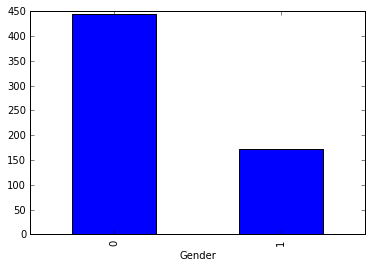

In [34]:
%matplotlib inline

# Plot the number of females / males
gender_counts = OSA_Demo_df.groupby('Gender')['ID'].count()

# create a quick bar chart
gender_counts.plot(kind='bar');

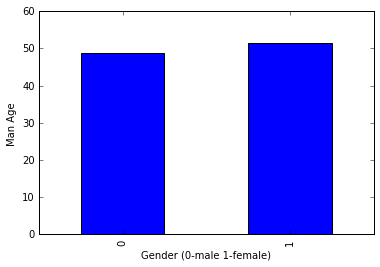

In [35]:
# Plot the mean age of females / males
gender_means = OSA_Demo_df.groupby('Gender')['Age'].mean()

# create a quick bar chart
s_plot=gender_means.plot(kind='bar');

s_plot.set_ylabel("Man Age")
s_plot.set_xlabel("Gender (0-male 1-female)")